### Home Loan Analysis

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Phase 1 : Data Collection and Preparation




##### Task 1.1: Load the Home Loan dataset into a Pandas DataFrame

In [188]:
url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

home_loan = pd.read_csv(url)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
home_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


##### Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies

In [ ]:
# Check the shape of the dataset
home_loan.shape
print(f"Dataset shape: {home_loan.shape}")

Dataset shape: (614, 13)


In [ ]:
# Checking duplicate
home_loan.duplicated().sum()

print(f"Total number of duplicated values:{home_loan.duplicated().sum()}")

Total number of duplicated values:0


In [ ]:
# Check datatype incosistencies
home_loan.dtypes
print(f"Dataset datatypes:\n{home_loan.dtypes}")

Dataset datatypes:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [ ]:
# Dataset columns
home_loan.columns
print(f"Dataset columns:\n{home_loan.columns}")

Dataset columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
# Check missing values
home_loan.isna().sum()
print(f"Missing values in each column:\n{home_loan.isna().sum()}")

Missing values in each column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


We hvae 13 missing values for gender, 15 missing values for dependents, 32 missing values for Self_Employed, 22 missing values for Loan Amount, 50 missing values for Credit_History, 14 missing values for Loan Amount Term and 3 missing values for Married

In [ ]:
# checking the statistical dataset info

print(f'Statistical dataset info:\n{home_loan.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Statistical dataset info:
None


##### Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.

##### Correcting data types


In [ ]:
# Lets make a Copy of our dataset

df = home_loan.copy()

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
# Convert 'Credit_History' to categorical with labels 'good' and 'bad'

df['Credit_History'] = df['Credit_History'].astype(str)

df['Credit_History']= df['Credit_History'].map({'1.0': 'good', '0.0': 'bad'}) 

In [ ]:
# Convert Loan Status to  categorical with labels 'Approved' and 'Denied'

df['Loan_Status'] = df['Loan_Status'].astype(str)
df['Loan_Status']= df['Loan_Status'].map({'Y': 'Approved', 'N': 'Denied'})

In [ ]:
# Check missing values again
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,good,Rural,Approved
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,good,Rural,Approved
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,good,Urban,Approved
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,good,Urban,Approved
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,bad,Semiurban,Denied


In [ ]:
# Check datatypes again
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

#### Handle missing values


In [190]:
# Check values counts for 'Gender' column
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [191]:
# Filling the missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\3896389089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [192]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [193]:
# For dependent

df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [198]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)



In [195]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Check
print(df['Self_Employed'].isna().sum())



0


C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\2094660709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [ ]:
df['Married'].fillna(df['Married'].mode()[0], inplace= True)



C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\1222608330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(df['Married'].mode()[0], inplace= True)


In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)

C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\1937419682.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)


In [ ]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace= True)

C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\449244352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace= True)


In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace= True)  

C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\3664597425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace= True)


In [ ]:
# Check missing values again
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

I have handled the missing values succesfully.

In [ ]:
df['Married'] = df['Married'].astype(str)

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

#### Addressing Outliers

In [ ]:
# Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,4617.091205,2479.806058,150.0,2877.50,3812.5,5795.00,10171.000
CoapplicantIncome,614.0,1419.702231,1624.605892,0.0,0.00,1188.5,2297.25,5743.125
LoanAmount,614.0,137.078990,55.847766,9.0,100.25,125.0,164.75,261.500
Loan_Amount_Term,614.0,360.000000,0.000000,360.0,360.00,360.0,360.00,360.000
Loan_Status,614.0,0.687296,0.463973,0.0,0.00,1.0,1.00,1.000


In [140]:
#  Looping to check the dataset for the number of outliers
#  Using IQR method (numerical dataset)
#Identify number of outliers

outlier_columns = []
for i in num_featurs:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_count = ((home_loan[i] < lower) | (home_loan[i] > upper)).sum()
    print(f"The number of outliers for {i} is {outlier_count}")
    if outlier_count > 0:
        outlier_columns.append(i)

The number of outliers for ApplicantIncome is 50
The number of outliers for CoapplicantIncome is 18
The number of outliers for LoanAmount is 41
The number of outliers for Loan_Amount_Term is 88


In [141]:

#Locate outliers using IQR method and clip
def clean_outliers(data, i):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data.loc[:, i] = np.where((data.loc[:, i] < lower) | (data.loc[:, i] > upper), 
                       data[i].clip(lower = lower, upper = upper).astype(data[i].dtype), data[i])
    return data

for i in outlier_columns:
    df = clean_outliers(df, i)

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,good,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,good,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,good,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,good,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,good,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,good,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,360.0,good,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,good,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,good,Urban,1


In [142]:
#Dataset after removing outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,4617.091205,2479.806058,150.0,2877.50,3812.5,5795.00,10171.000
CoapplicantIncome,614.0,1419.702231,1624.605892,0.0,0.00,1188.5,2297.25,5743.125
LoanAmount,614.0,137.078990,55.847766,9.0,100.25,125.0,164.75,261.500
Loan_Amount_Term,614.0,360.000000,0.000000,360.0,360.00,360.0,360.00,360.000
Loan_Status,614.0,0.687296,0.463973,0.0,0.00,1.0,1.00,1.000


##### Phase 2: Exploratory Data Analysis (EDA)


##### Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.

In [ ]:
# Define a function to check the statistical summary
def univariate_numerical_eda(df, column):
    """
    Performing univariate EDA on each numerical columns.
    Display the statistical summary skewness, kurtosis, histogram, KDE and boxplot
    """
    print(f"Feature: {column}")
    print("-" * 40)
    print(df[column].describe().to_frame())
    print(f"Skewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))


    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='orange')
    plt.title(f"\n Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Box Plot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f"\n Boxplot of {column}", fontsize=13)

    plt.tight_layout()
    plt.show()

    # Transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed, Consider log or Box-Cox transformation")
    elif abs(df[column].skew()) > 0.5:
        print(f"\n{column} is moderately skewed")
    else:
        print(f"{column} is fairly symmetric")

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
count,614.000000,614.000000,614.000000,614.0,614.000000
mean,4617.091205,1419.702231,137.078990,360.0,0.687296
std,2479.806058,1624.605892,55.847766,0.0,0.463973
min,150.000000,0.000000,9.000000,360.0,0.000000
25%,2877.500000,0.000000,100.250000,360.0,0.000000
50%,3812.500000,1188.500000,125.000000,360.0,1.000000
75%,5795.000000,2297.250000,164.750000,360.0,1.000000
max,10171.000000,5743.125000,261.500000,360.0,1.000000


Task 2.2: Visualize distributions of numerical features using histograms and box plots.



In [ ]:
# Lets find the numerical funtions

num_featurs = df.select_dtypes(include=['float64', 'int64']).columns
num_featurs

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [144]:
# Let's find the categorical functions
cat_features = df.select_dtypes(include=['object']).columns
cat_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area'],
      dtype='object')

Feature: ApplicantIncome
----------------------------------------
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000
Skewness: 6.540
Kurtosis: 60.541


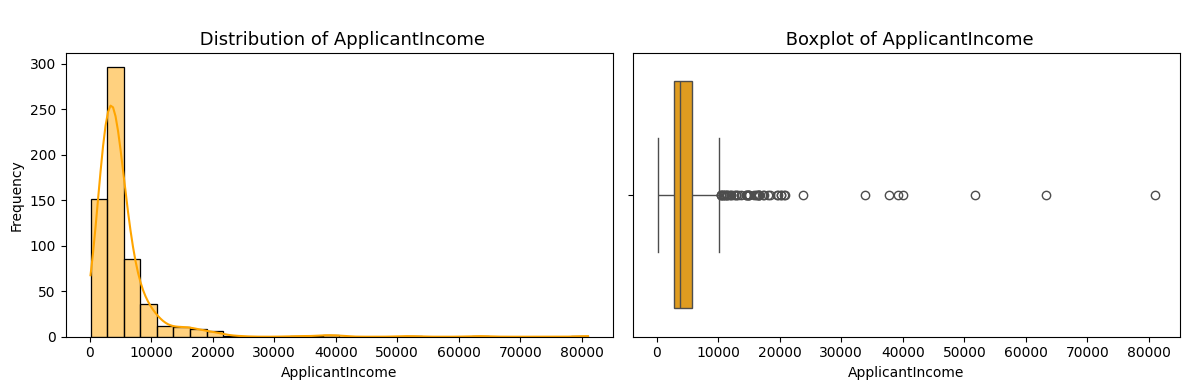


 ApplicantIncome is highly skewed, Consider log or Box-Cox transformation


In [ ]:
univariate_numerical_eda(df, 'ApplicantIncome')

Feature: ApplicantIncome
----------------------------------------
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000
Skewness: 6.540
Kurtosis: 60.541


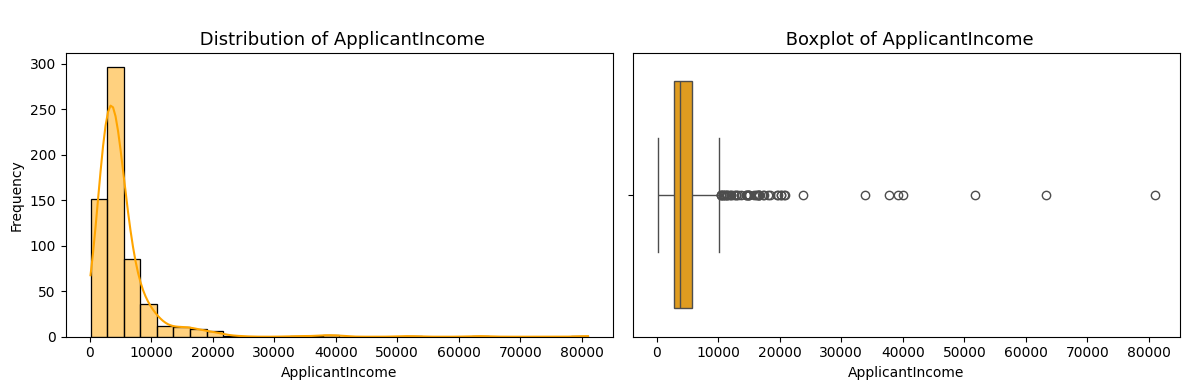


 ApplicantIncome is highly skewed, Consider log or Box-Cox transformation
Feature: CoapplicantIncome
----------------------------------------
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000
Skewness: 7.492
Kurtosis: 84.956


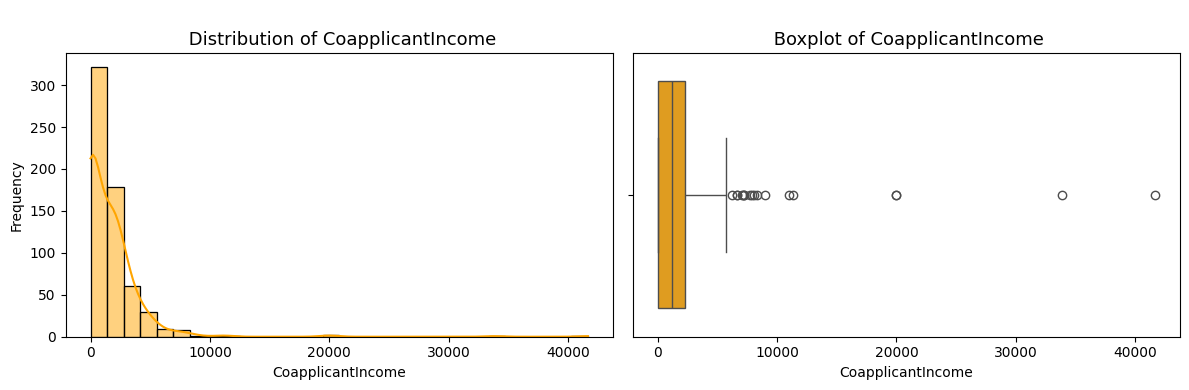


 CoapplicantIncome is highly skewed, Consider log or Box-Cox transformation
Feature: LoanAmount
----------------------------------------
       LoanAmount
count  614.000000
mean   145.465798
std     84.180967
min      9.000000
25%    100.250000
50%    125.000000
75%    164.750000
max    700.000000
Skewness: 2.745
Kurtosis: 10.926


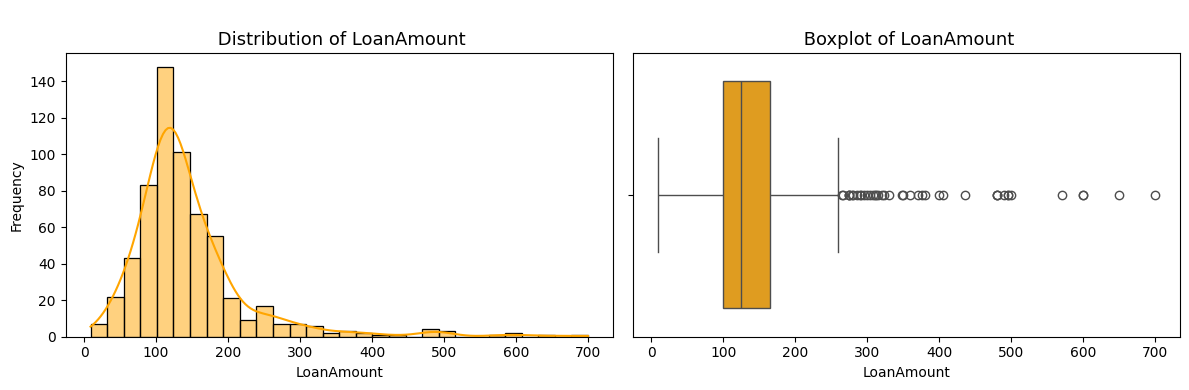


 LoanAmount is highly skewed, Consider log or Box-Cox transformation
Feature: Loan_Amount_Term
----------------------------------------
       Loan_Amount_Term
count        614.000000
mean         342.410423
std           64.428629
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000
Skewness: -2.402
Kurtosis: 6.925


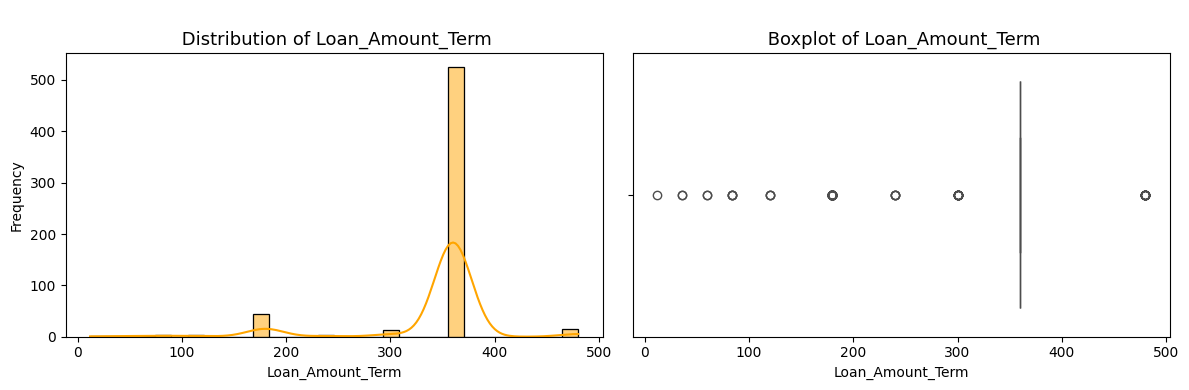


 Loan_Amount_Term is highly skewed, Consider log or Box-Cox transformation


In [ ]:
for col in num_featurs:
    univariate_numerical_eda(df, col)

##### Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts

In [145]:
def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f" Feature: {column}")
    print("="*40)

    # Frequency + Proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize = True) *100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

     # Visualization (piechart)
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribution Piechart of {column}", fontsize=13)

    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                                        f'{(height/total)*100:.1f}%', ha= 'center')
        
        plt.tight_layout()
        plt.show()

Skipping Loan_ID — has more than 20 unique categories.
 Feature: Gender
        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24



C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\3004464930.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


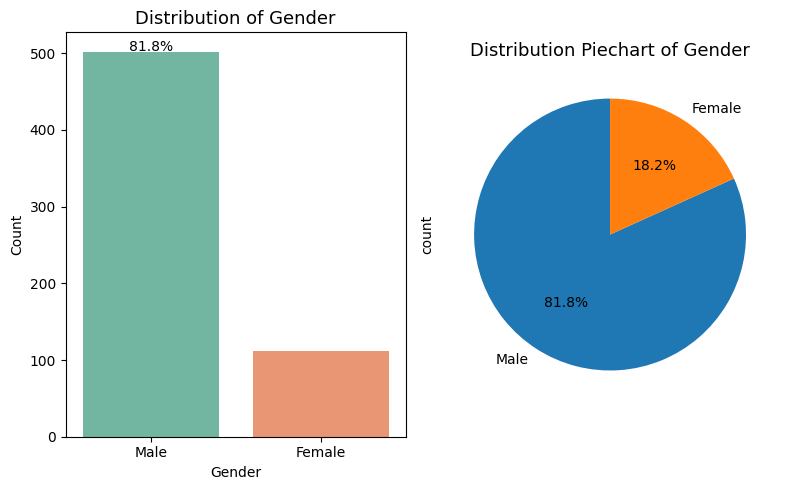

<Figure size 640x480 with 0 Axes>

 Feature: Married
         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69



C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\3004464930.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


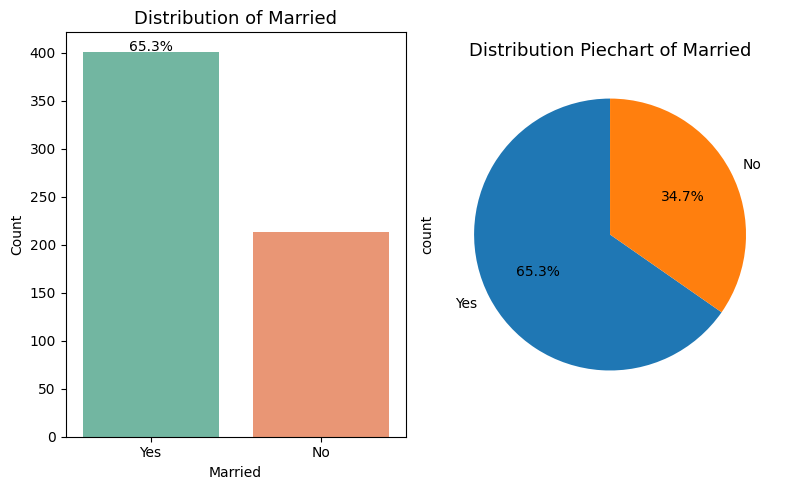

<Figure size 640x480 with 0 Axes>

 Feature: Dependents
            Count  Percentage
Dependents                   
0             360       58.63
1             102       16.61
2             101       16.45
3+             51        8.31



C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\3004464930.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


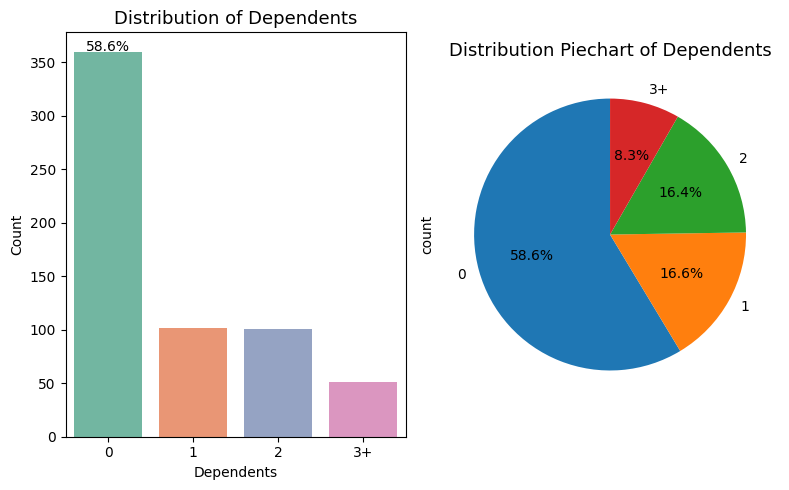

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

 Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\3004464930.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


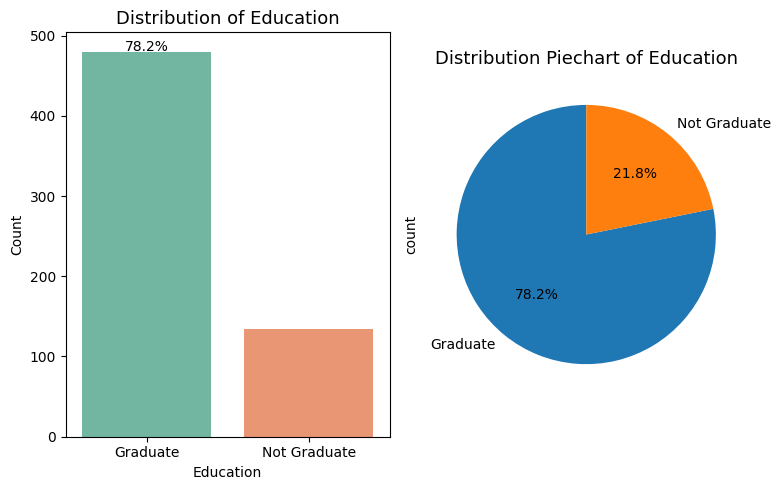

<Figure size 640x480 with 0 Axes>

 Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36



C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\3004464930.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


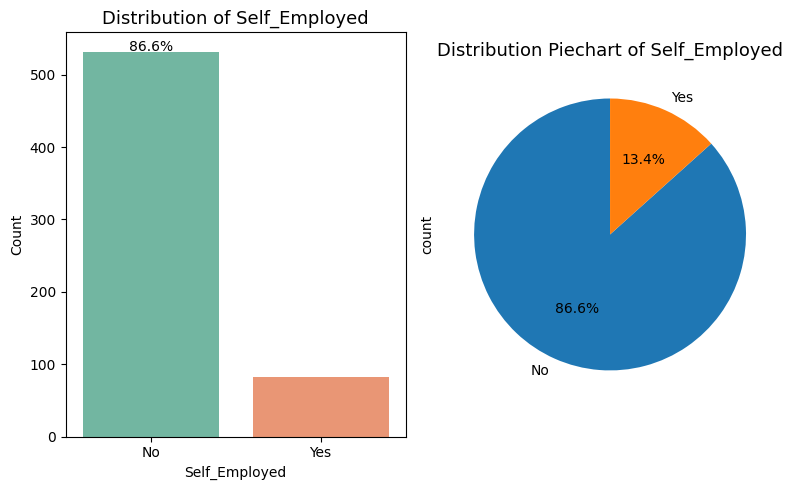

<Figure size 640x480 with 0 Axes>

 Feature: Credit_History
                Count  Percentage
Credit_History                   
good              525        85.5
bad                89        14.5



C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\3004464930.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


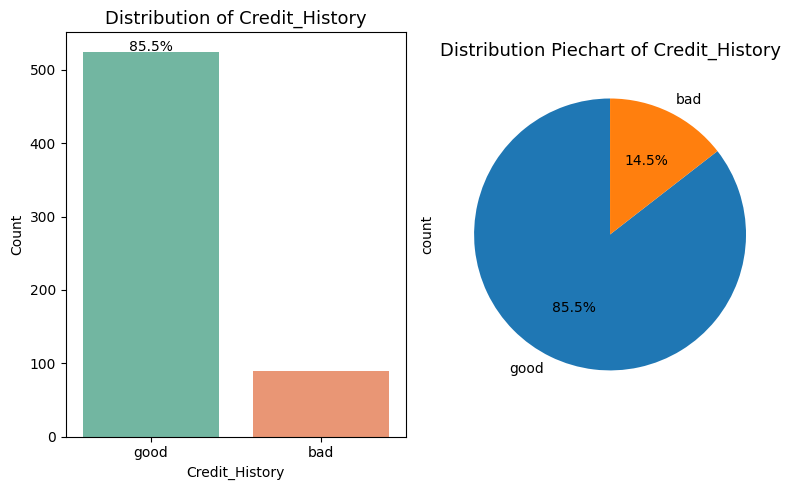

<Figure size 640x480 with 0 Axes>

 Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\XCEPTIONALGLOBAL\AppData\Local\Temp\ipykernel_9688\3004464930.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


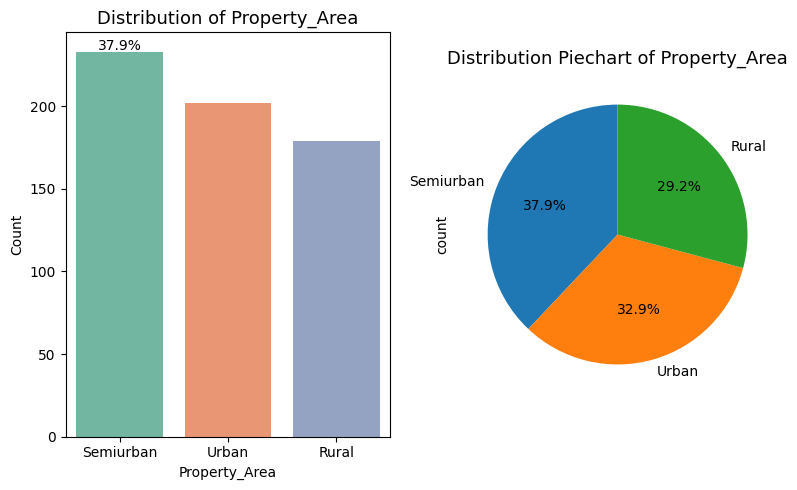

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [146]:
for col in cat_features:
    if df[col].nunique() < 20:
        univariate_categorical_eda(df, col)
    else:
        print(f"Skipping {col} — has more than 20 unique categories.")
    

##### Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.

##### Bivariate Analysis

In [173]:
home_loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [174]:
df = home_loan.copy()

In [175]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [176]:
freq = df['Loan_Status'].value_counts()
prop = df['Loan_Status'].value_counts(normalize = True) * 100


In [177]:
count_summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
count_summary

,Count,Percentage
Loan_Status,,
Y,422,68.73
N,192,31.27


Text(0, 0.5, 'Count')

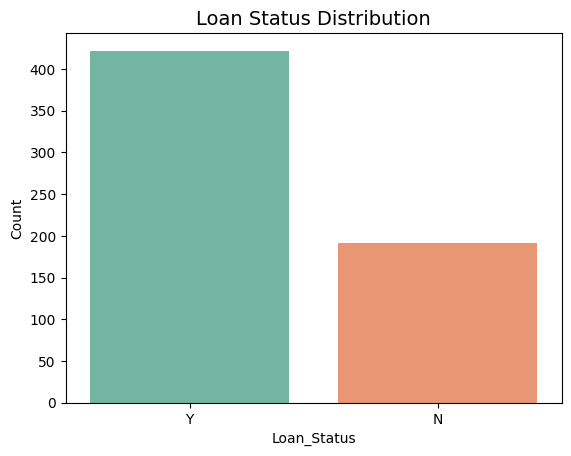

In [178]:
# Visualisation
ax = sns.countplot(x = 'Loan_Status', data = df, order = freq.index, color = "teal", palette = "Set2", hue = 'Loan_Status')
plt.title("Loan Status Distribution", size = 14)
plt.xlabel("Loan_Status")
plt.ylabel("Count")

In [179]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N' : 0})

<Axes: >

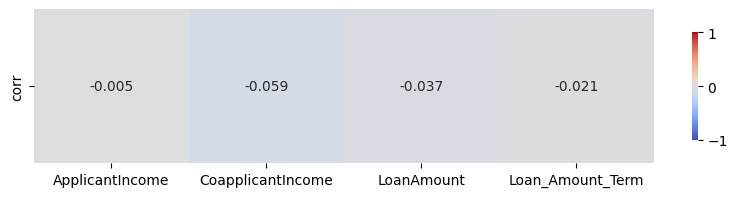

In [180]:

target_corr = df[num_featurs].corrwith(df['Loan_Status']).to_frame("corr").T

plt.figure(figsize = (10, 2))
sns.heatmap(target_corr, annot = True, fmt = ".3f", cmap = "coolwarm", center = 0, vmin = -1, vmax = 1, 
            cbar_kws = {"orientation": "vertical", "shrink": 0.7})

In [181]:
from scipy import stats

def reg_plot(data, col1, col2):
    """
    Visualise the relationship between numerical columns using regplot
    """

    """
    Params
    ----------
    data : pd.DataFrame
        Data containing numerical features
    col1 : str
        Name of the first column
    col2 : str
        Name of the second column
    """
    try:
        if col1 in data.columns and col2 in data.columns:
            corr, pvalue = stats.pearsonr(df[col1], df[col2])
            ax = sns.regplot(data = data, x = col1, y = col2, scatter_kws = {'alpha':0.4}, line_kws = {'color': 'red'}, color = "blue")
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            ax.set_title(f"{col1} vs {col2} \nCorrelation: {corr:.3f}, p value: {pvalue:.3f}")
            plt.show()
        else:
            raise ValueError("Columns not found in data")
    except ValueError as e:
        print(e)

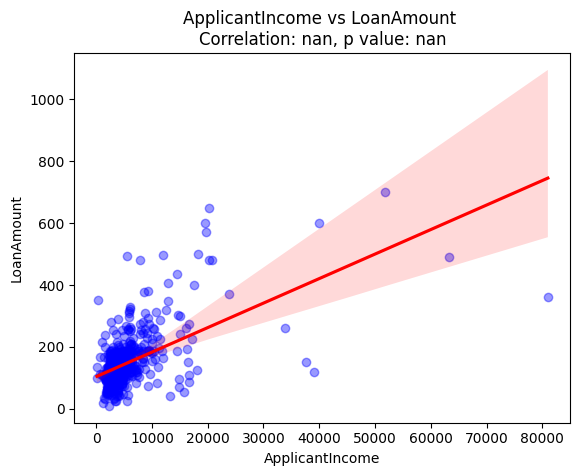

In [182]:

reg_plot(df, "ApplicantIncome", "LoanAmount")

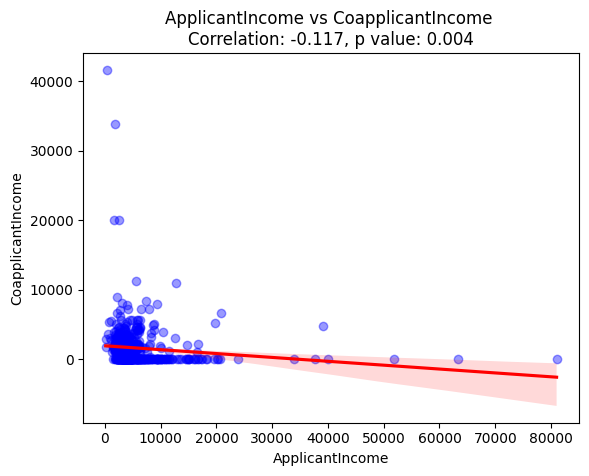

In [183]:

reg_plot(df, "ApplicantIncome", "CoapplicantIncome")

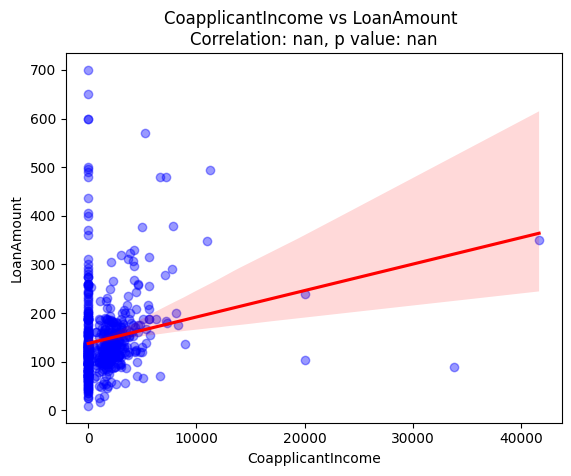

In [184]:

reg_plot(df, "CoapplicantIncome", "LoanAmount")

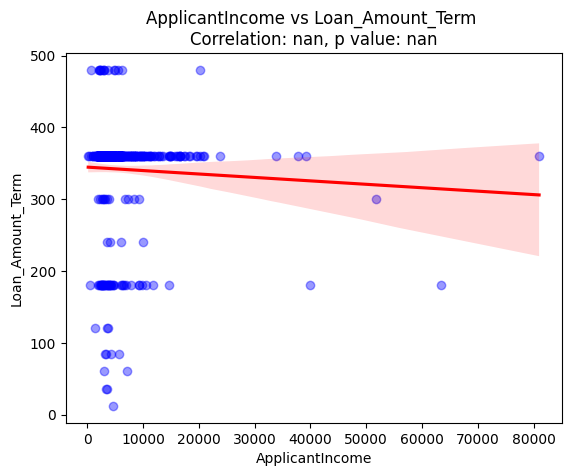

In [185]:
reg_plot(df, "ApplicantIncome", "Loan_Amount_Term")

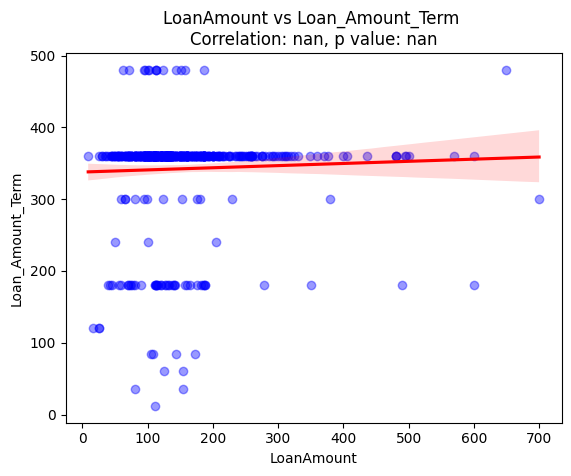

In [186]:
reg_plot(df, "LoanAmount", "Loan_Amount_Term")

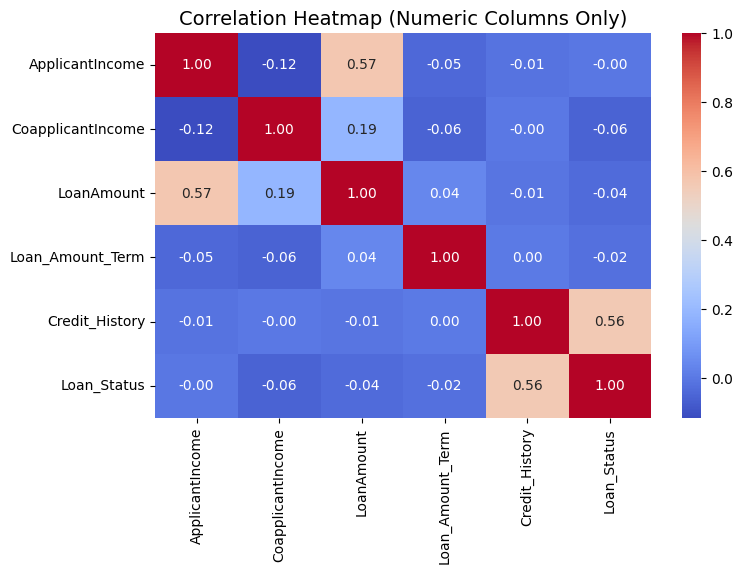

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns Only)', fontsize=14)
plt.show()

Phase 3: Reporting and Insights